# <center> Econ 577: Quantitative Economics (with Python) </center>
## <center> Homework 8 (Group)</center>

# <font color='red'>Name:</font>

# <font color='red'>Instructions:</font>
- Save all of your code to a .ipynb file (jupyter notebook file) and name it as **username_hw8.ipynb**, where username is the username of the group member who submits the homework. 
    - **You should remove any test cells/code that is outside of functions.**
    - Submit only username_hw8.ipynb file
- For each question, your file should contain a function labeled **q#** with input/output requirements specified below. 
    - The input refers to the arguments passed to the function. 
    - The output refers to what is returned by the function.
    - We may require output to file or screen within a function, but if that is the case it will be clearly specified.
    - Your functions may call other functions or classes that you create, but they have to be included in the file (i.e., the file that you submit should be self-contained).
    - If your function calls on functions from other libraries, you need to load them within the function (e.g., if you use the os library you should assume that it has been installed on the computer but it has not been imported before calling your function).
    

## Grading

- We will run your file by clicking Kernel--> Restart and Run All. You file should be able to reproduce all the results stored in your jupyter file. 

- We may also run your code by specifying q#(arg) in an empty cell. It should reproduce your stored results. 

Each question is graded on a 3-point scale + 1 point for following the instructions 
- 0 -- no or minimal work submitted (e.g., minor modification of the 'starting point')
- 1 -- some work done but there are errors running/executing the code or results are mostly incomplete
- 2 -- code runs, but results are either somewhat incomplete, incorrect, or there is clear room for improvement (e.g., no comments in the code, graphs are not labelled, etc.) 
- 3 -- all results complete and correct with clear commented code 

In [2]:
#libraries that will be used in this HW 
import os
import shutil as sh
import pandas as pd
#you can add other libraries as needed
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
# To find your working directory:
%pwd 
# Code in case you want to change your working directory:  %cd


'C:\\Users\\xinxi\\Dropbox\\Spring2022\\ECON590\\HW8'

# Question 1
Implement Shelling's (1969) model on a 2-D grid as discussed in the lecture. Specifically, compare the overall segregation between the case when the threshold is .35 and the case when the threshold is .65.  To do this, carry out at least 1000 simulations to obtain the average evolution of the segregation measure for each case and plot two lines on the same graph to make the comparison clear. (Consider 10x10 grid to start)

Hints:
1. Start from changing the 1D "Environment" class defined in class to a 2D class. To do so, instead of defining the "width" of the line, you want to define both the width and the length of your grid. In the HW, start with a 2D grid = 10x10
2. Start with 2 races and some empty spaces. Their proportions are as follows: 

    races = np.array([0,1,2]

    prop= np.array([.10,.675,.225])
    
3. You want to record the segregation measure in each step to show the evolution. Define the seggregation as the average proportion of neighbors that have the same race as self for all agents. 
4. You may want to firstly change the environment to be on a 2D grid and carry out 2 sets of simulations with the threshold .35 and .65 separately. 

    
Output: plot 2 lines to show the evolution of the segregation measure for the case .35 and .65. The x-axis is time (number of iterations). The y-axis is the average segregation measure of the 1000 simulations.

- **Output**: a pdf figure saved to file username_q1.pdf (saved to the output folder)
    - Make sure that your graph contains axis labels and proper legends

In [8]:
class Agent:
    ''' Class definition of the Agent in Schelling 1D model'''
    
    def __init__(self,location,race,neighbors,threshold): #Object constructor
        ''' Initialize agent.
                location -- location of the agent
                race -- race of the agent
                neighborhood -- list of neighbors
                threshold -- similarity threshold
        '''
        self.loc = location
        self.race = race
        self.neighborhood = neighbors
        self.thresh = threshold

    def satisfied(self): 
        '''function that returns True of False depending if the threshold is met'''
        return np.mean((self.neighborhood==self.race))>self.thresh


    def moveToNewLoc(self,newLoc,newNeighbors): 
        '''function that updates the new neighborhood info'''
        self.loc=newLoc
        self.neighborhood=newNeighbors

    def getSegregationMetric(self):
        self.seg = np.mean((self.neighborhood==self.race))
        return self.seg

    def __repr__(self):
        return "L"+str(self.loc)+" R:"+str(self.race)+" N:"+str(self.neighborhood)
    def __str__(self):
        return "L"+str(self.loc)
    
class Environment:
    ''' Class definition of the Environment of Schelling 1D model'''
    
    def __init__(self, races, props, width=10, length=10, threshold=1/3, max_iter=10000):
        ''' Initialize environment.
                races -- array of races (e.g., [0,1,2]) with 0 denoting an empty space
                props -- proportion of races
                width -- width of the line
                threshold -- similarity threshold
                max_iter -- maximum number of iterations
        '''

        self.width = width
        self.length = length
        self.races = races  
        self.props = props        
        self.threshold = threshold
        self.max_iter = max_iter

        self.agents = []
        self.grid = []
        self.available_locs=[]
        self.all_satisfied=False


    def resetLine(self):
        '''Function to reset line'''
        self.grid=np.zeros((self.length*self.width)) #initialize the line to be empty (all zeros)
        self.available_locs=range((self.width*self.length)) #initialize available spots to be all
        for i in self.races[1:]: #For each race i starting with 1 (since 0 denotes an empty spot)
            #generate random locations for proportion self.prop[i] of the spots
            locs=np.random.choice(self.available_locs,size=int(self.props[i]*self.width*self.length),replace=False)
            self.grid[locs]=self.races[i] 
            self.available_locs=np.setdiff1d(self.available_locs,locs) #remote spots occupied by race i from available

        self.agents = [] #create a list of agents corresponding to the line above
        for i,r in enumerate(self.grid):
            if r>0:
                if i < 10:
                    upHood=np.array([])
                else:
                    upHood=np.array([self.grid[i-10]])
                if i > 89:
                    downHood=np.array([])
                else:
                    downHood=np.array([self.grid[i+10]])
                if i%10 == 0:
                    leftHood=np.array([])
                else:
                    leftHood=np.array([self.grid[i-1]])
                if i%10 == 9:
                    rightHood=np.array([])
                else:
                    rightHood=np.array([self.grid[i+1]])

                hood=np.concatenate([leftHood,upHood,rightHood,downHood],axis=0)
                self.agents.append(Agent(i,r,hood,self.threshold))


    def oneMoveEach(self): #Go through each agent and see it is satisfied. If not move it to one of the available spots
        self.all_satisfied = True #set it to true, if encounter anyone that is not satisfied then set it to false
        for a in self.agents:

            if not a.satisfied():
                self.all_satisfied = False
                oldLoc=a.loc
                newLoc=np.random.choice(self.available_locs,size=1)[0]

                self.grid[oldLoc]=0
                self.grid[newLoc]=a.race

                self.available_locs=np.setdiff1d(self.available_locs,newLoc)

                #-------------------- This is where the neighborhood is created ----------------------
                if newLoc < 10:
                    newUpHood=np.array([])
                else:
                    newUpHood=np.array([self.grid[newLoc-10]])
                if newLoc > 89:
                    newDownHood=np.array([])
                else:
                    newDownHood=np.array([self.grid[newLoc+10]])
                if newLoc%10 == 0:
                    newLeftHood=np.array([])
                else:
                    newLeftHood=np.array([self.grid[newLoc-1]])
                if newLoc%10 == 9:
                    newRightHood=np.array([])
                else:
                    newRightHood=np.array([self.grid[newLoc+1]])

                newHood=np.concatenate([newLeftHood,newUpHood,newRightHood,newDownHood],axis=0)            

                a.moveToNewLoc(newLoc,newHood)
                self.available_locs=np.append(self.available_locs,np.array([oldLoc]),axis=0)

            
    def getPopulationMetric(self):
        self.popMetric=np.array([a.getSegregationMetric() for a in self.agents])
        return self.popMetric.mean()
    
    def runUntilConverged(self):
        yvals=[]
        step=0
        while not self.all_satisfied or step<=self.max_iter:
            yvals.append(self.getPopulationMetric())
            self.oneMoveEach()
            step = step + 1
        return yvals

    def __repr__(self):
        return str(self.grid)            
    def __str__(self):
        return str(self.grid)

def q1():
    
    races = np.array([0,1,2])
    prop = np.array([.10,.675,.225])
    
    xvals = list(range(0,1001))

    e1 = Environment([0,1,2],[.1,.675,.225],threshold=.35,max_iter=1000)
    e2 = Environment([0,1,2],[.1,.675,.225],threshold=.65,max_iter=1000)
    
    yvals1=e1.runUntilConverged()
    yvals2=e2.runUntilConverged()
    
    plt.plot(xvals,yvals1,label='Threshold=35%')
    plt.plot(xvals,yvals2,label='Threshold=65%')
    plt.xlabel('Iteration')
    plt.ylabel('Segregation measure')
    plt.legend

# Question 2

Replicate the first two rows of Column 1 in Table 2 in Gode & Sunder (1993)

In [3]:
def q2() :
    class Buyer(): #Buyer faces diminishing marginal returns
    
        def __init__(self,demand,LB=1,UB=200,ID=None):    #Constructor. demand is a list of buyer values sorted from high to low
            self.ID=ID
            self.demand=np.array(demand)
            self.units=0
            self.profit=0
            self.upperBound=UB
            self.lowerBound=LB

        def generateBid(self):
            if len(self.demand)>0:
                return np.random.choice(np.arange(self.lowerBound,self.upperBound+1)) #Choose a random number between upper and lower bound
            else:
                return None

        def bought(self,price):
            self.units+=1
            self.profit+=self.demand[0]-price #How much the buyer is willing to pay (demand) and how much the buyer paid (price)
            self.demand=self.demand[1:] #update profit and demand


        def __str__(self):
            return "B"+str(self.ID)+str(self.demand)
        def __repr__(self):
            return "B"+str(self.ID)+str(self.demand)

    class Seller():
    
        def __init__(self,supply,LB=1,UB=200,ID=None): #Constructor. supply is a list of seller costs sorted from low to high
            self.ID=ID
            self.supply=np.array(supply)
            self.units=len(supply)
            self.profit=0
            self.upperBound=UB
            self.lowerBound=LB

        def generateAsk(self):
            if len(self.supply)>0:
                return np.random.choice(np.arange(self.lowerBound,self.upperBound+1))
            else:
                return None

        def sold(self,price):
            self.units-=1
            self.profit+=price-self.supply[0]
            self.supply=self.supply[1:]

        def __str__(self):
            return "S"+str(self.ID)+str(self.supply)
        def __repr__(self):
            return "S"+str(self.ID)+str(self.supply)
    
    class Auction():
    
        def __init__(self,demandBuyers,supplySellers,LB=1,UB=200):

            self.buyers=[Buyer(x,LB,UB) for x in demandBuyers] #Create a list of buyers
            self.sellers=[Seller(x,LB,UB) for x in supplySellers] #Create a list of sellers

            self.nBuyers=len(demandBuyers)
            self.nSellers=len(supplySellers)

            self.upperBound=UB
            self.lowerBound=LB

        def simulateOneTransaction(self): #only need to keep track of the best, i.e. improved buy/sell; sell at buyer's ask

            bestBid=self.lowerBound
            bestAsk=self.upperBound

            bestBuyer=None
            bestSeller=None
            
        def oneMoveEach(self): #Go through each agent and see it is satisfied. If not move it to one of the available spots
            self.all_satisfied = True #set it to true, if encounter anyone that is not satisfied then set it to false
            for a in self.agents:

                if not a.satisfied():
                    self.all_satisfied = False
                    oldLoc=a.loc
                    newLoc=np.random.choice(self.available_locs,size=1)[0]

                    self.line[oldLoc]=0
                    self.line[newLoc]=a.race

                    self.available_locs=np.setdiff1d(self.available_locs,newLoc)

                    #-------------------- This is where the neighborhood is created ----------------------
                    newLeftHood=self.line[range(max(0,newLoc-4),max(0,newLoc))]
                    newRightHood=self.line[range(min(newLoc+1,self.width),min(newLoc+5,self.width))]
                    newHood=np.concatenate([newLeftHood,newRightHood],axis=0)            

                    a.moveToNewLoc(newLoc,newHood)
                    self.available_locs=np.append(self.available_locs,np.array([oldLoc]),axis=0)
    
        def runUntilConverged(self):
            step=0
            while not self.all_satisfied or step<=self.max_iter:
                print(step)
                self.oneMoveEach()
                step = step + 1

    # Set up for Market 1
    buyerVals=[[100,95,90,85,80,75] for x in range(6)] #Generate 6 buyers (with 6 buyer values)
    sellerVals=[[40,50,60,70,80,90] for x in range(6)] #Generate 6 sellers (with 6 seller values)
    a1=Auction(buyerVals,sellerVals) #Create an auction
    
    #Zero-intelligence unconstrained calculation
    seller_profit = [] #Empty list to store seller profit
    buyer_profit = [] #Empty list to store buyer profit
    
    #Calculate profit for six units for unconstrained
    for x in range(6):

        b1 = Buyer([100,95,90,85,80,75],ID=1) #Number of items and each upper bound

        b1.generateBid()
        #print("b1.generateBid():", b1.generateBid())

        s1 = Seller ([50,60,70,80,90,100],ID=1)

        s1.generateAsk()
        #print("s1.generateAsk():",s1.generateAsk())
        
        amount = s1.generateAsk()

        s1.sold(amount) #Ex: Profit would be 13 if sold at 63 since cost 50
        #print("s1.sold:",s1.sold(amount))

        s1.profit
        #print("s1.profit:",s1.profit)
        seller_profit.append(s1.profit)

        b1.bought(amount) #Ex: Profit would be 37 if bought at 63 since valued at 100
        #print("b1.bought:",b1.bought(amount))

        b1.units
        #print("b1.units:",b1.units)

        b1.profit    
        #print("b1.profit:",b1.profit)
        buyer_profit.append(b1.profit)

    #print("seller_profit:", seller_profit)
    #print("buyer_profit:", buyer_profit)
    
    total_profit_earned_by_traders = sum(seller_profit)+sum(buyer_profit) #Sum the profits of the sellers and buyers
    #print("total_profit_earned_by_traders:",total_profit_earned_by_traders)
    
    maximum_total_profit = (100-80)+(95-80)+(85-90)+(80-80)+(80-50)+(80-60)+(80-70)+(80-80) #Sum the maximum surplus, given equilibrium at 80
    
    ZI_U_efficiency = 100-(total_profit_earned_by_traders/maximum_total_profit)

    #print("ZI_U_efficiency:",ZI_U_efficiency)

    #Zero-intelligence constrained calculation
    seller_profit = [] #Empty list to store seller profit
    buyer_profit = [] #Empty list to store buyer profit
    
    #Calculate profit for six units for constrained
    

    #print("seller_profit:", seller_profit)
    #print("buyer_profit:", buyer_profit)
    
    total_profit_earned_by_traders = sum(seller_profit)+sum(buyer_profit) #Sum the profits of the sellers and buyers
    #print("total_profit_earned_by_traders:",total_profit_earned_by_traders)
    
    maximum_total_profit = (100-80)+(95-80)+(85-90)+(80-80)+(80-50)+(80-60)+(80-70)+(80-80) #Sum the maximum surplus, given equilibrium at 80
    
    total_profit_earned_by_traders = sum(seller_profit)+sum(buyer_profit)
    
    ZI_C_efficiency = 100-(total_profit_earned_by_traders/maximum_total_profit)    
    
    #print("ZI_C_efficiency:",ZI_C_efficiency, "\n")
    
    buyerVals=[[100,95,90,85,80,75] for x in range(6)] #Generate 6 buyers (with 6 buyer values)
    sellerVals=[[40,50,60,70,80,90] for x in range(6)] #Generate 6 sellers (with 6 seller values)
    a1=Auction(buyerVals,sellerVals) #Create an auction
    
    #Results
    d = {'Traders': ["ZI-U", "ZI-C"], 'Market_1': [ZI_U_efficiency, ZI_C_efficiency]}
    df = pd.DataFrame(data=d)
    df=df.set_index('Traders')
    print(df)
    
q2()

           Market_1
Traders            
ZI-U      96.666667
ZI-C     100.000000


# Question 3 

Suppose each agent starts with 5 strategies (ALLD, ALLC, TFT, GRIM, DTFT) and plays the repeated prisoner dilemma game for $M=500$ matches. In each match, they will choose a strategy and play with another player for $T=20$ rounds. Across matches, they use reinforcement learning to update their probability of choosing the strategies. Simulate the process for $S = 100$ times and see whether cooperation can be achieved. Plot the share of cooperation over the 500 matches. 

At the begininning of each match $m$, the simulation takes the following steps:
- 1. Each player $i$ follows the  probabilistic choice rule to choose one of the five strategies to play. The probability of choosing a strategy $s_{i,k}$ is: 

       $$ \frac{e^{\lambda v_{i,k}(m)}}{\sum e^{\lambda v_{i,j}(m)} } $$
    
where $v_{i,k}(m)$ is the value to play strategy $k$ and $\sum v_{i,j}(m)$ is the sum over all player $i$'s strategies.

- 2. Once the strategies are chosen, the players will decide their actions for each round of the total $T=20$ rounds.They will then know their total payoffs for match m. 
    - ALLD: the player will always choose D.
    - ALLC: the player will always choose C.
    - TFT: the player starts with C and replicates his/her opponent's action in the previous round.
    - GRIM: the player starts with C and will continue C as long as the opponent chooses C; however, if the opponent chose D in the previous round, the player will choose D and never switch back to C.
    - DTFT: similar to TFT, the difference is that the player will start with D. 
    
(The strategy functions are given below.) 

- 3. Once the payoff of playing strategy $k$ ($P_{i,k}(m)$) is determined, the value of strategy $k$ for match $m+1$ will be updated following this equation: 

$$ v_{i,k}(m+1) = (1-\alpha) v_{i,k}(m) + \alpha P_{i,k}(m)$$

In terms of parameters: 

- The game is symmetric and the payoff of the row player is:
\begin{array}{ccc} 
 & C & D \\
C & 32 & 12\\ 
D & 50 & 25
\end{array}

- The weight given to the realized payoff is $\alpha = 0.2$. 

- Assume at match 1, the probability of choosing each strategy is equal to 20%. 




In [41]:
# Useful strategies

def s1_allc(other_history):
    """Always cooperate strategy"""  
    return 0                          

def s2_alld(other_history):
    return 1

def s3_tft(other_history):
    """Tit-for-tat strategy"""      
    n = len(other_history)           
    if n == 0:
        return 0
    else:
        return other_history[-1]

def s4_dtft(other_history):
    """Suspicious Tit-for-Tat strategy"""
    n = len(other_history)          
    if n == 0:                              
        return 1
    else:
        return other_history[-1]

def s5_grim(other_history):
    """Grim trigger strategy"""                
    n = len(other_history)                   
    if n == 0:
        return 0
    else:
        return np.min(other_history)

In [114]:
def cooperative(strategies):
  cop = np.zeros(shape=(5,5), dtype=np.float16)
  for r,s1 in enumerate(strategies):
    for c,s2 in enumerate(strategies):
      arr1 = [] # tool used to calc each combination 
      arr2 = []
      result = 0
      for turn in range(20):
        arr1.append(s1(arr2))
        arr2.append(s2(arr1))
        if arr1[turn] == 0 and arr2[turn] == 0:
          result += 1
      cop[r][c] = result/20
  return cop

In [115]:
def payoff(G,strategies):
  payoff = np.zeros(shape=(5,5), dtype=np.float16)
  for r,s1 in enumerate(strategies):
    for c,s2 in enumerate(strategies):
      arr1 = [] # tool used to calc each combination 
      arr2 = []
      result = 0
      for turn in range(20):
        num1 = s1(arr2)
        arr1.append(num1)
        num2 = s2(arr1)
        arr2.append(num2)
        result += G[num1,num2]
      payoff[r][c] = result
  return payoff

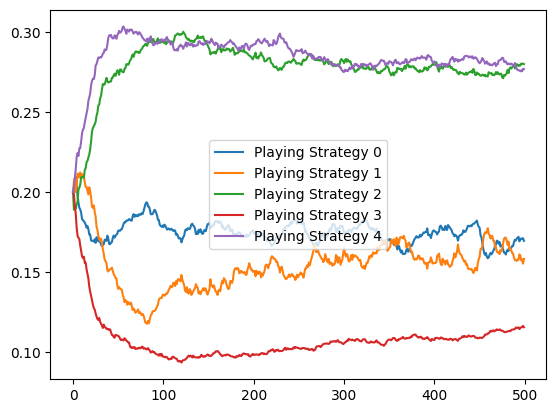

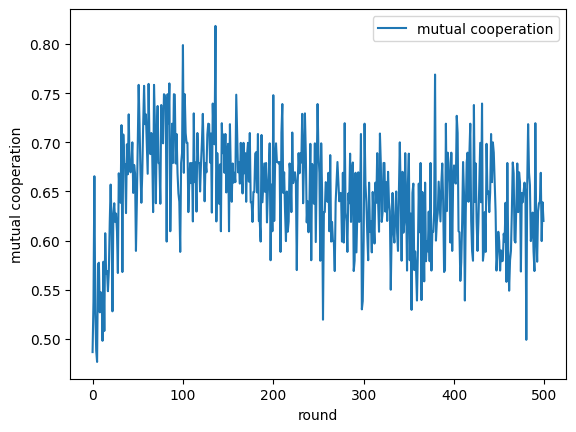

In [117]:
def q3():
  #Initialize the game matrix (notice that it is symmetric, so I can just keep track of payoffs from one player's perspective)
  G = np.array([[32,12],[50,25]])
  strategies_fun = [s1_allc, s2_alld, s3_tft,s4_dtft,s5_grim]
  G=payoff(G,strategies_fun)
  cop = cooperative(strategies_fun)
  T = 500
  
  #Initialize the strategy set
  strategies = np.arange(5)
  
  #Initialize RL parameters
  lam = .01 # may need to scale down due to large numbers
  alpha = .2
  copresults = np.zeros(T)
  results1 = np.zeros(T)
  results2 = np.zeros(T)
  results3 = np.zeros(T)
  results4 = np.zeros(T)
  results5 = np.zeros(T)
  simulation_iteration = 100
  for sim in range(simulation_iteration):
    #Initialize Values
    values1 = np.ones(5)*(G.min()+G.max())/5
    values2 = np.ones(5)*(G.min()+G.max())/5
    
    for match in range(T):
        
        policy1 = np.exp(lam*values1)/np.exp(lam*values1).sum()
        action1 = np.random.choice(strategies,p=policy1) 

        policy2 = np.exp(lam*values2)/np.exp(lam*values2).sum()
        action2 = np.random.choice(strategies,p=policy2)

        r1 = G[action1,action2] #payoff
        r2 = G[action2,action1]
        
        values1[action1] = (1-alpha)*values1[action1] + alpha*r1
        values2[action2] = (1-alpha)*values2[action2] + alpha*r2
        
        copresults[match]+=cop[action1,action2]
        results1[match]+=(policy1[0]+policy2[0])/2 #PROBILITY OF either player CHOSING 0
        results2[match]+=(policy1[1]+policy2[1])/2
        results3[match]+=(policy1[2]+policy2[2])/2
        results4[match]+=(policy1[3]+policy2[3])/2
        results5[match]+=(policy1[4]+policy2[4])/2

  f1 = plt.figure()
  plt.plot([i/simulation_iteration for i in results1], label = 'Playing Strategy 0')
  plt.plot([i/simulation_iteration for i in results2], label = 'Playing Strategy 1')
  plt.plot([i/simulation_iteration for i in results3], label = 'Playing Strategy 2')
  plt.plot([i/simulation_iteration for i in results4], label = 'Playing Strategy 3')
  plt.plot([i/simulation_iteration for i in results5], label = 'Playing Strategy 4')
  plt.legend()
  f2 = plt.figure()
  plt.plot([i/simulation_iteration for i in copresults], label = 'mutual cooperation')
  plt.legend()
  plt.xlabel('round')
  plt.ylabel('mutual cooperation')
q3()